In [1]:
import numpy as np
from astropy.io import fits
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
possible_targets = np.genfromtxt('HALO7D_Gaia_possible_targets_photometry.dat', dtype=None, encoding=None, skip_header=1)

def column(matrix, i):
    return [row[i] for row in matrix]

name = column(possible_targets, 0)
ra = column(possible_targets, 1)
dec = column(possible_targets, 2)
gaia_g = column(possible_targets, 3)
gaia_b = column(possible_targets, 4)
gaia_r = column(possible_targets, 5)

OSError: HALO7D_Gaia_possible_targets_photometry.dat not found.

In [ ]:
# this is a test
with fits.open('spec1d_science_stars/spec1d.hgc1a.000.G_65084863834752.fits.gz') as fits_data:
    blue_data = fits_data[1].data
    red_data = fits_data[2].data
    data_specs = blue_data.field('SPEC').tolist() + red_data.field('SPEC').tolist()
    data_spec = [item for sublist in data_specs for item in sublist]
    data_lambdas = blue_data.field('LAMBDA').tolist() + red_data.field('LAMBDA').tolist()
    data_lambda = [item for sublist in data_lambdas for item in sublist]
    
    median_computation_spec = []
    median_computation_lambda = []
    for i, j in enumerate(data_spec):
        if data_lambda[i] >= 6200 and data_lambda[i] <= 9000:
            median_computation_spec.append(data_spec[i])
            median_computation_lambda.append(data_lambda[i])
        else:
            continue
    
print(np.median(median_computation_spec))    

In [ ]:
# just a test
list_name = []
for filename in os.listdir('spec1d_science_stars'):
    if filename.endswith(".gz"): 
        list_name.append(filename[17:33])
        continue
    else:
        continue

In [ ]:
# Apparent Magnitude R vs. median continuum flux level (6200-9000 Angstrom)
science_stars_red = []

for filename in os.listdir('spec1d_science_stars'):
    index = name.index(filename[17:33])
    filepath = 'spec1d_science_stars/' + filename
    with fits.open(filepath) as fits_data:
        blue_data = fits_data[1].data
        red_data = fits_data[2].data
        data_specs = blue_data.field('SPEC').tolist() + red_data.field('SPEC').tolist()
        data_lambdas = blue_data.field('LAMBDA').tolist() + red_data.field('LAMBDA').tolist()
        data_spec = [item for sublist in data_specs for item in sublist]
        data_lambda = [item for sublist in data_lambdas for item in sublist]
    
        median_computation_spec = []
        median_computation_lambda = []
        for i, j in enumerate(data_spec):
            if data_lambda[i] >= 6200 and data_lambda[i] <= 9000:
                median_computation_spec.append(data_spec[i])
                median_computation_lambda.append(data_lambda[i])
            else:
                continue
    median = np.median(median_computation_spec)
    science_stars_red.append([index, filename[17:33], -2.5*np.log10(median), gaia_r[index]])

In [ ]:
# Apparent Magnitude G vs. median continuum flux level (4500-8000 Angstrom)
science_stars_green = []

for filename in os.listdir('spec1d_science_stars'):
    index = name.index(filename[17:33])
    filepath = 'spec1d_science_stars/' + filename
    with fits.open(filepath) as fits_data:
        blue_data = fits_data[1].data
        red_data = fits_data[2].data
        data_specs = blue_data.field('SPEC').tolist() + red_data.field('SPEC').tolist()
        data_lambdas = blue_data.field('LAMBDA').tolist() + red_data.field('LAMBDA').tolist()
        data_spec = [item for sublist in data_specs for item in sublist]
        data_lambda = [item for sublist in data_lambdas for item in sublist]
    
        median_computation_spec = []
        median_computation_lambda = []
        for i, j in enumerate(data_spec):
            if data_lambda[i] >= 4500 and data_lambda[i] <= 8000:
                median_computation_spec.append(data_spec[i])
                median_computation_lambda.append(data_lambda[i])
            else:
                continue
    median = np.median(median_computation_spec)
    science_stars_green.append([index, filename[17:33], -2.5*np.log10(median), gaia_g[index]])

In [ ]:
# Apparent Magnitude B vs. median continuum flux level (4500-6500 Angstrom)
science_stars_blue = []

for filename in os.listdir('spec1d_science_stars'):
    index = name.index(filename[17:33])
    filepath = 'spec1d_science_stars/' + filename
    with fits.open(filepath) as fits_data:
        blue_data = fits_data[1].data
        red_data = fits_data[2].data
        data_specs = blue_data.field('SPEC').tolist() + red_data.field('SPEC').tolist()
        data_lambdas = blue_data.field('LAMBDA').tolist() + red_data.field('LAMBDA').tolist()
        data_spec = [item for sublist in data_specs for item in sublist]
        data_lambda = [item for sublist in data_lambdas for item in sublist]
    
        median_computation_spec = []
        median_computation_lambda = []
        for i, j in enumerate(data_spec):
            if data_lambda[i] >= 4500 and data_lambda[i] <= 6500:
                median_computation_spec.append(data_spec[i])
                median_computation_lambda.append(data_lambda[i])
            else:
                continue
    median = np.median(median_computation_spec)
    science_stars_blue.append([index, filename[17:33], -2.5*np.log10(median), gaia_b[index]])

In [ ]:
def InitializePlot():
    plt.clf()
    f= plt.figure(figsize=(8,8))
    plt.xlim()
    plt.ylim()
    plt.xlabel('')
    plt.ylabel('')

In [ ]:
x_red = [item[3] for item in science_stars_red]
y_red = [item[2] + 27 for item in science_stars_red]

f = InitializePlot()
plt.scatter(x_red, y_red, c = 'red', s = 1, edgecolors = 'red')
plt.gca().set_aspect('equal')

In [3]:
x_green = [item[3] for item in science_stars_green]
y_green = [item[2] + 27 for item in science_stars_green]

f = InitializePlot()
plt.scatter(x_green, y_green, c = 'green', s = 1, edgecolors = 'green')
plt.gca().set_aspect('equal')

NameError: name 'science_stars_green' is not defined

<Figure size 432x288 with 0 Axes>

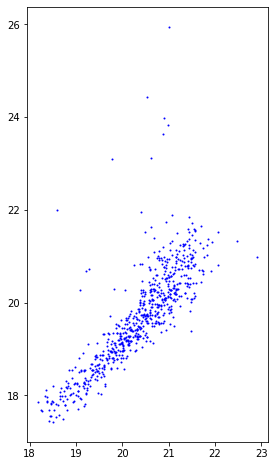

In [28]:
x_blue = [item[3] for item in science_stars_blue]
y_blue = [item[2] + 27 for item in science_stars_blue]

f = InitializePlot()
plt.scatter(x_blue, y_blue, c = 'blue', s = 1, edgecolors = 'blue')
plt.gca().set_aspect('equal')

In [27]:
print(science_stars_blue[0])

[13, 'G_65084863834752', 940.116455078125, 20.55309]


<Figure size 432x288 with 0 Axes>

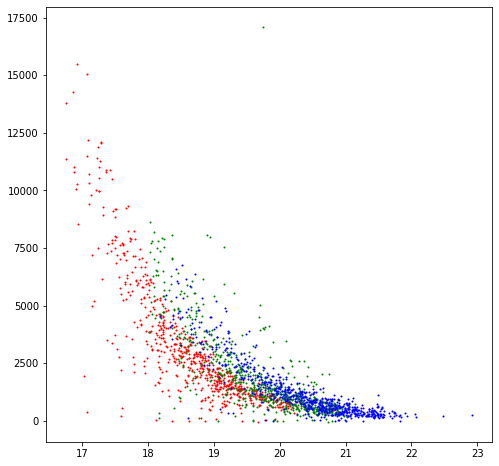

In [28]:
x_red = [item[3] for item in science_stars_red]
y_red = [item[2] for item in science_stars_red]

x_green = [item[3] for item in science_stars_green]
y_green = [item[2] for item in science_stars_green]

x_blue = [item[3] for item in science_stars_blue]
y_blue = [item[2] for item in science_stars_blue]

f = InitializePlot()
plt.scatter(x_red, y_red, c = 'red', s = 1, edgecolors = 'red')
plt.scatter(x_green, y_green, c = 'green', s = 1, edgecolors = 'green')
plt.scatter(x_blue, y_blue, c = 'blue', s = 1, edgecolors = 'blue')
